## Week 6 Scratch Paper and Notes

In [1]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn import set_config
set_config(display='diagram')


In [3]:
## Data Filepaths
cali_filepath = "/content/drive/MyDrive/Data/cali_housing.csv"

# Linear Regression
- Regression line predicts y values for a given x input (x is input feature / y is target feature)
- Error term is distance between prediction and the true value.
- Default metric of evaluating a regression model is R^2. R^2 is typically given as a decimal but interpreted as a percent. IE how much can the variance in y be explained by X. The higher the R^2 the better.
- Overfitting: When the model does significantly better on the train set than on the test set. 

## Overview
- Regression line predicts y values for a given x input (x is input feature / y is target feature)
- Error term is distance between prediction and the true value.
- Default metric of evaluating a regression model is R^2. R^2 is typically given as a decimal but interpreted as a percent. IE how much can the variance in y be explained by X. The higher the R^2 the better.
- Overfitting: When the model does significantly better on the train set than on the test set. 

## Python Example

In [4]:
# Load cali data from cali_filepath and inspect
cali_df = pd.read_csv(cali_filepath)
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Assign target and matrix. Target is the median house value
y = cali_df['MedHouseVal']
X = cali_df.drop(columns = ['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
# Instantiate Linear Regression as reg.
reg = LinearRegression()

In [7]:
reg.fit(X_train, y_train)

LinearRegression()

In [8]:
# Obtain R^2 values for train/test sets.
train_score = reg.score(X_train, y_train)
print(f"training set R^2 value: {round(train_score,4)}")

test_score = reg.score(X_test, y_test)
print(f"test set R^2 value: {round(test_score, 4)}")

training set R^2 value: 0.6099
test set R^2 value: 0.5911


In [9]:
# Pulling out Predictions
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

test_preds

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

## Regression Metrics

In [10]:
# Will need: (commented out and added above... here fore reference).
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error

### Coefficient of Determination (R^2)
- Default metric of evaluating a regression model. 
- Can be obtained using the model.score() or the sklearn function rs_score().

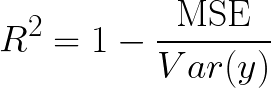




In [11]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
r2_train
r2_test

0.5910509795491351

### Mean Absolute Error (MAE)
-Mean of the absolute value of the errors. Can be thought of as average error.
- Sklearn mean_absolute_error()

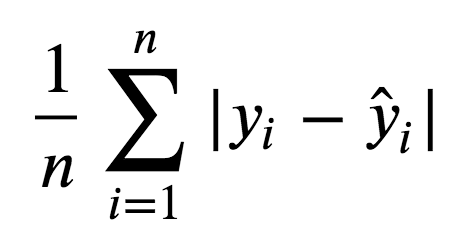

In [12]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

### Mean Squared Error (MSE)
- Punishes larger errors (due to squaring). 
- Is continuous and differentiable making it better than MAE for optimization.
- Sklearn function mean_squared_error()

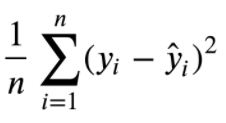

In [13]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

### Root Mean Squared Error (RMSE)
- Square root of MSE. Similar result but easier to understand.
- No sklearn function. just np.sqrt() to the MSE.

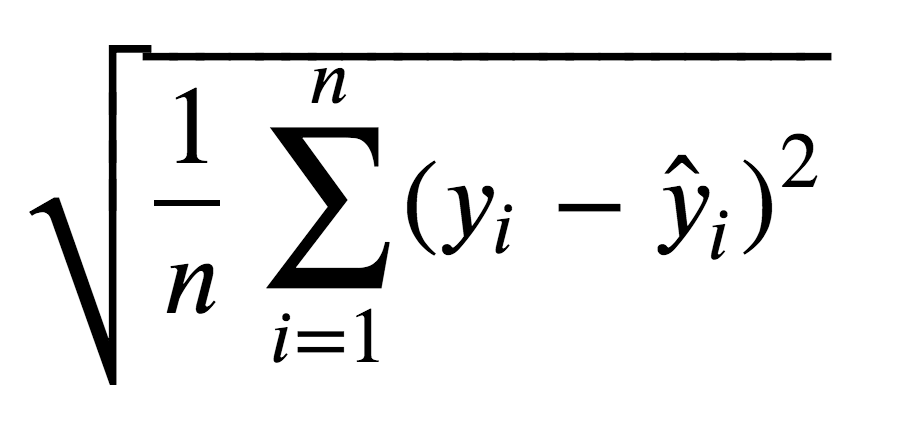

In [14]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

# Decision Trees

## Overview
- Supervised learning algorithm which asks a series of questions designed to assign a class or predict a value.
- Starts with the entire set and asks questions designed to split the data in ways that will be maximally predictive.
- comprised of nodes. Root nodes are the top, decision/internal nodes are splits below the root, leaf/terminal nodes are the end.


Advantages
- Easy to intepret
- Can be used for both regression and classification
- Fast

Disadvantages
- Typically perform worse than other supervised learning methods
- prone to overfitting without tuning

## Python Example

In [15]:
# Load cali data from cali_filepath and inspect
cali_df = pd.read_csv(cali_filepath)
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
y = cali_df['MedHouseVal']
X = cali_df.drop(columns = 'MedHouseVal')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
dec_tree = DecisionTreeRegressor(random_state = 42)

dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [19]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {round(test_score, 3)}')

Train Score: 1.0
Test Score: 0.601


In [20]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [21]:
depth = dec_tree.get_depth()
leaves = dec_tree.get_n_leaves()
print(f'Depth: {depth}')
print(f'Leaves: {leaves}')

Depth: 36
Leaves: 14841


In [22]:
max_depth_range = list(range(2,36))

r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                                     random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

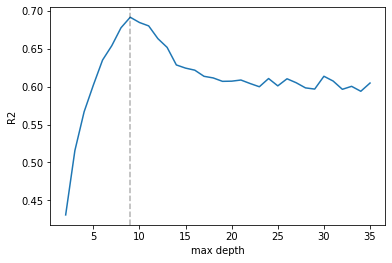

In [23]:
plt.plot(max_depth_range, r2)
plt.axvline(9, color = 'k', ls = '--', alpha = .3)
plt.xlabel('max depth')
plt.ylabel('R2');

In [24]:
dec_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.7961670169616584
0.6913416719998345


# Bagged Trees

## Overview
- A variation on decision trees that relies on 'bagging' which is a combination of bootstrapping and aggregation. *Bootstrapping* is the process of random sampling with replacement. *Aggregating* is the process of combining individual results into a whole.
- Bagged trees model takes the training data and creates multiple (n) number of trees using bootstrapping and then aggregates the result to get a better result than a single decision tree.

Advantages
- Better performance
- More reliable estiamte of feature importance
- Can be used for both classification and regression

Disadvantages
- More difficult to interpret
- SLower to train/predict
- Random sampling can create trees which correlate with one another

Bagged Trees are typically grown deep unlike Decision Trees so that htey have low bias/high variance.


## Python Example

In [25]:
# from sklearn.ensemble import BaggingRegressor

In [26]:
#Instantiate bagging regression
bagreg = BaggingRegressor(random_state = 42)

In [27]:
# check parameters
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [28]:
# Train the model
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [29]:
# view predictions... save if wanted
bagreg.predict(X_test)

array([0.5058  , 0.6723  , 4.908308, ..., 1.057   , 2.9243  , 4.2562  ])

In [30]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(f'Bagged Trees Train Score: {bagreg_train_score:.3f}')
print(f'Bagged Trees Test Scpre" {bagreg_test_score:.3f}')

Bagged Trees Train Score: 0.961
Bagged Trees Test Scpre" 0.789


# Random Forests

## Overview
- A varaition of Bagged trees which randomly limits which features can/cannot be chosen as a split candidate at each node.
- Allows for variation beyond very strong features and eliminates the liklihood of correlated trees introducing variance to the model.

## Python Example

In [31]:
# from sklearn.ensemble import RandomForestRegressor

In [32]:
#Instantiate Random Forest
rf = RandomForestRegressor(random_state = 42)

In [33]:
# Inspect default params
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [34]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
rf.predict(X_test)

array([0.50262  , 0.7139   , 4.9008466, ..., 1.23913  , 3.0341205,
       4.1185512])

In [36]:
rf_train_scores = rf.score(X_train, y_train)
rf_test_scores = rf.score(X_test, y_test)
print(f'Random Forest Train Score: {rf_train_scores:.3f}')
print(f'Random Forest Test Score: {rf_test_scores:.3f}')

Random Forest Train Score: 0.973
Random Forest Test Score: 0.808


# Scores Comparison

In [37]:
print('LINEAR REGRESSION')
print(f'Linear Regression Train Score: {r2_train:.3f}')
print(f'Linear Regression Test Score: {r2_test:.3f}')
print('\nDECISION TREES')
print(f'Decision Tree (depth 9) Train Score: {train_9_score:.3f}')
print(f'Decision Tree (depth 9) Test Score: {test_9_score:.3f}')
print('\nBAGGED TREES')
print(f'Bagged Trees Train Score: {bagreg_train_score:.3f}')
print(f'Bagged Trees Test Scpre" {bagreg_test_score:.3f}')
print('\nRANDOM FOREST')
print(f'Random Forest Train Score: {rf_train_scores:.3f}')
print(f'Random Forest Test Score: {rf_test_scores:.3f}')

LINEAR REGRESSION
Linear Regression Train Score: 0.610
Linear Regression Test Score: 0.591

DECISION TREES
Decision Tree (depth 9) Train Score: 0.796
Decision Tree (depth 9) Test Score: 0.691

BAGGED TREES
Bagged Trees Train Score: 0.961
Bagged Trees Test Scpre" 0.789

RANDOM FOREST
Random Forest Train Score: 0.973
Random Forest Test Score: 0.808
